<a href="https://colab.research.google.com/github/AishwaryaMuchandi/B.E-Project/blob/master/lane_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
ofrom google.colab import drive
drive.mount('/content/drive')

In [0]:
import matplotlib.image as mping
import matplotlib.pyplot as plt
import numpy as np
import cv2
# importing and reading the image and store them in to the variable called image note the image must be in png formate for jupyter noteboook 
path="/content/drive/My Drive/Colab Notebooks/lane1.jpg"
image=cv2.imread(path)

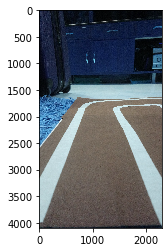

In [0]:
plt.imshow(image)

In [0]:
image

array([[[16, 27, 57],
        [23, 34, 64],
        [22, 33, 63],
        ...,
        [11, 14, 18],
        [11, 14, 18],
        [11, 14, 18]],

       [[36, 47, 77],
        [40, 51, 81],
        [31, 42, 72],
        ...,
        [10, 13, 17],
        [10, 13, 17],
        [10, 13, 17]],

       [[47, 58, 88],
        [53, 64, 94],
        [42, 53, 83],
        ...,
        [ 9, 12, 16],
        [10, 13, 17],
        [10, 13, 17]],

       ...,

       [[43, 54, 62],
        [35, 46, 54],
        [42, 53, 61],
        ...,
        [ 8, 22, 45],
        [15, 29, 52],
        [13, 27, 50]],

       [[29, 40, 48],
        [27, 38, 46],
        [31, 42, 50],
        ...,
        [13, 27, 50],
        [24, 38, 61],
        [20, 34, 57]],

       [[20, 31, 39],
        [41, 52, 60],
        [33, 44, 52],
        ...,
        [20, 34, 57],
        [27, 41, 64],
        [17, 31, 54]]], dtype=uint8)

array([[35, 42, 41, ..., 15, 15, 15],
       [55, 59, 50, ..., 14, 14, 14],
       [66, 72, 61, ..., 13, 14, 14],
       ...,
       [55, 47, 54, ..., 27, 34, 32],
       [41, 39, 43, ..., 32, 43, 39],
       [32, 53, 45, ..., 39, 46, 36]], dtype=uint8)

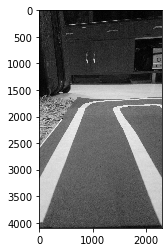

In [0]:
#converting RGB image to grayscale image
image2=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image2,cmap='gray')
image2

array([[53, 52, 48, ..., 13, 14, 14],
       [55, 53, 50, ..., 13, 14, 14],
       [57, 56, 52, ..., 13, 14, 14],
       ...,
       [50, 50, 49, ..., 38, 38, 39],
       [47, 47, 46, ..., 36, 37, 38],
       [45, 45, 44, ..., 35, 37, 37]], dtype=uint8)

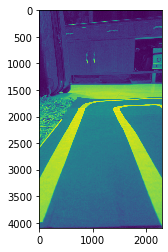

In [0]:
lane_image=cv2.GaussianBlur( image2, (7,7), 0)
plt.imshow(lane_image)
lane_image

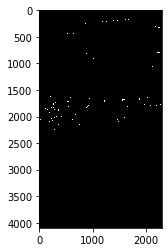

In [0]:
threshhold_low=10
threshhold_high=200
image2=cv2.Canny(lane_image,threshhold_low,threshhold_high)
plt.imshow(image2,cmap='gray')


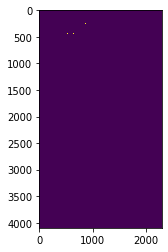

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [0]:
vertices = np.array([[(0,700),(200,0),(800,0),(1000,700)]], dtype=np.int32)    
mask = np.zeros_like(image2)   
cv2.fillPoly(mask, vertices,255)
masked_image = cv2.bitwise_and(image2, mask)
plt.figure()
plt.imshow(masked_image)
plt.show()
masked_image

In [0]:
rho = 2            # distance resolution in pixels 
theta = np.pi/180  # angular resolution in radians 
threshold = 40     # minimum number of votes 
min_line_len = 10  # minimum number of pixels making up a line
max_line_gap = 50  # maximum gap in pixels between connectable line segments    
lines = cv2.HoughLinesP(masked_image, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    
# Create an empty black image
line_image = np.zeros((masked_image.shape[0], masked_image.shape[1], 3), dtype=np.uint8)
    
for line in lines:
    for x1,y1,x2,y2 in line:      
        cv2.line(line_image, (x1, y1), (x2, y2), [255, 0, 0], 20)
lines 

array([[[489, 289, 783, 263]],

       [[601, 271, 869, 247]],

       [[491, 282, 762, 258]],

       [[741, 345, 851, 333]],

       [[509, 438, 612, 429]],

       [[745, 266, 809, 259]],

       [[602, 269, 693, 264]],

       [[389, 593, 399, 692]],

       [[720, 346, 757, 342]],

       [[810, 259, 841, 257]],

       [[507, 443, 559, 439]],

       [[377, 605, 395, 647]],

       [[733, 267, 872, 253]]], dtype=int32)

In [0]:
α = 1
β = 1
γ = 0    

# Resultant weighted image is calculated as follows: original_img * α + img * β + γ
Image_with_lines = cv2.addWeighted(image, α, line_image, β, γ)


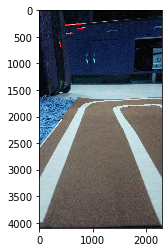

In [0]:
plt.figure()
plt.imshow(Image_with_lines)